# Assignment-04-Simple Linear Regression-1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats

In [2]:
time = pd.read_csv("C:/Users/BASHAR/OneDrive/Documents/Data Science/Assignment/Assignment - 4/delivery_time.csv")
time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
time = time.rename({"Delivery Time":"D_Time", "Sorting Time":"S_Time"}, axis=1)
time

,D_Time,S_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [4]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D_Time  21 non-null     float64
 1   S_Time  21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S_Time', ylabel='Density'>

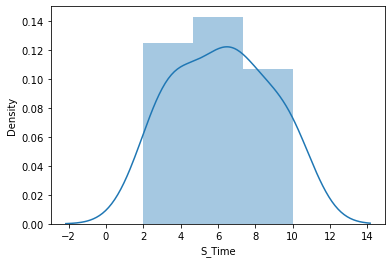

In [5]:
sns.distplot(time["S_Time"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D_Time', ylabel='Density'>

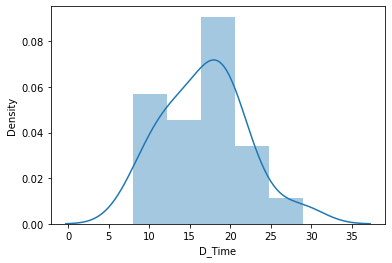

In [6]:
sns.distplot(time["D_Time"])

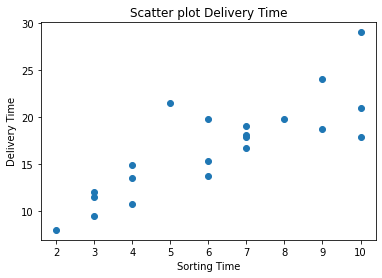

In [7]:
plt.scatter(x="S_Time", y="D_Time", data=time)
plt.title('Scatter plot Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

<AxesSubplot:>

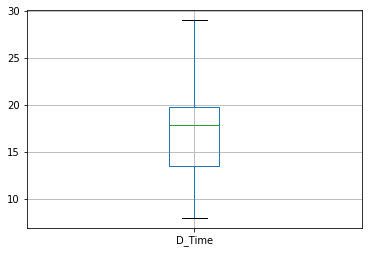

In [8]:
time.boxplot(column=['D_Time'])

<AxesSubplot:>

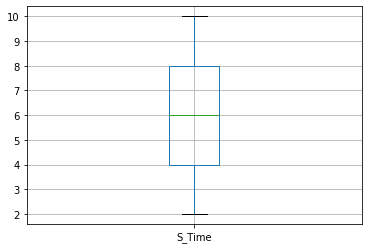

In [9]:
time.boxplot(column=['S_Time'])

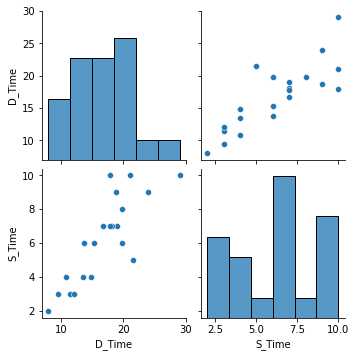

In [10]:
sns.pairplot(time)

# Correlation Analysis

In [11]:
time.corr()

,D_Time,S_Time
D_Time,1.000000,0.825997
S_Time,0.825997,1.000000


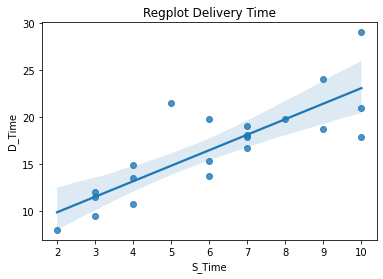

In [13]:
sns.regplot(x="S_Time", y="D_Time", data=time)
plt.title('Regplot Delivery Time')
plt.show()

# Model Building
# 1 - No Tranformation

In [14]:
x= time["S_Time"]
y= time["D_Time"]

In [15]:
model_1 = sm.ols("y~x", data=time).fit()
model_1.predict(time)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [17]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        18:20:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2 - Log Transformation of X

In [18]:
log_x = np.log(x)
model_2 = sm.ols("y~log_x", data=time).fit()
model_2.predict(time)

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [19]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           2.64e-06
Time:                        18:24:28   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
log_x          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3 - Log Transformation of y

In [21]:
log_y = np.log(y)
model_3 = sm.ols("log_y~x", data=time).fit()
model_3.predict(time)

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [22]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.59e-06
Time:                        18:25:53   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
x              0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 - Log Transformation of x and y

In [23]:
model_4 = sm.ols("log_y~log_x", data=time).fit()
model_4.predict(time)

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [24]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.60e-07
Time:                        18:26:55   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
log_x          0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5 - Sq Root Transformation of x

In [25]:
x_sqrt = np.sqrt(x)
model_5 = sm.ols("y~x_sqrt", data=time).fit()
model_5.predict(time)

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [26]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           2.61e-06
Time:                        18:28:43   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
x_sqrt         7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6 - Sq Root Transformation of y

In [27]:
y_sqrt = np.sqrt(y)
model_6 = sm.ols("y_sqrt~x", data=time).fit()
model_6.predict(time)

0     4.839049
1     3.599258
2     4.012522
3     4.632417
4     4.839049
5     4.012522
6     4.219154
7     3.392626
8     4.839049
9     4.632417
10    4.425786
11    3.599258
12    4.219154
13    3.392626
14    3.392626
15    3.599258
16    4.012522
17    4.219154
18    3.185995
19    4.219154
20    3.805890
dtype: float64

In [28]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           2.00e-06
Time:                        18:29:50   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
x              0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7 - Sq Root Transformation of x and y

In [29]:
model_7 = sm.ols("y_sqrt~x_sqrt", data=time).fit()
model_7.predict(time)

0     4.782767
1     3.617912
2     4.068399
3     4.620129
4     4.782767
5     4.068399
6     4.265095
7     3.349369
8     4.782767
9     4.620129
10    4.448176
11    3.617912
12    4.265095
13    3.349369
14    3.349369
15    3.617912
16    4.068399
17    4.265095
18    3.030827
19    4.265095
20    3.854504
dtype: float64

In [30]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           8.48e-07
Time:                        18:31:29   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
x_sqrt         1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 8 Reciprocal transformation of x

In [31]:
rec_x = 1/x
model_8 = sm.ols("y~rec_x", data=time).fit()
model_8.predict(time)

0     20.626216
1     14.786139
2     18.030626
3     20.193617
4     20.626216
5     18.030626
6     18.957622
7     11.541652
8     20.626216
9     20.193617
10    19.652870
11    14.786139
12    18.957622
13    11.541652
14    11.541652
15    14.786139
16    18.030626
17    18.957622
18     5.052678
19    18.957622
20    16.732831
dtype: float64

In [32]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     34.27
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.23e-05
Time:                        18:32:44   Log-Likelihood:                -52.571
No. Observations:                  21   AIC:                             109.1
Df Residuals:                      19   BIC:                             111.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5196      1.484     16.518      0.000      21.413      27.626
rec_x        -38.9338      6.651     -5.854      0.000     -52.854     -25.014
==============================================================================
Omnibus:                        7.255   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.797
Skew:                           1.050   Prob(JB):                       0.0909
Kurtosis:                       4.037   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9 Reciprocal transformation of y

In [33]:
rec_y = 1/y
model_9 = sm.ols("rec_y~x", data=time).fit()
model_9.predict(time)

0     0.037807
1     0.081532
2     0.066957
3     0.045095
4     0.037807
5     0.066957
6     0.059670
7     0.088819
8     0.037807
9     0.045095
10    0.052382
11    0.081532
12    0.059670
13    0.088819
14    0.088819
15    0.081532
16    0.066957
17    0.059670
18    0.096107
19    0.059670
20    0.074244
dtype: float64

In [34]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rec_y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     40.68
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           4.06e-06
Time:                        18:34:02   Log-Likelihood:                 62.471
No. Observations:                  21   AIC:                            -120.9
Df Residuals:                      19   BIC:                            -118.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1107      0.008     14.526      0.000       0.095       0.127
x             -0.0073      0.001     -6.378      0.000      -0.010      -0.005
==============================================================================
Omnibus:                        1.096   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.224
Skew:                           0.199   Prob(JB):                        0.894
Kurtosis:                       3.313   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 10 Reciprocal transformation of x and y

In [35]:
model_10 = sm.ols("rec_y~rec_x", data=time).fit()
model_10.predict(time)

0     0.046246
1     0.075670
2     0.059323
3     0.048425
4     0.046246
5     0.059323
6     0.054653
7     0.092017
8     0.046246
9     0.048425
10    0.051150
11    0.075670
12    0.054653
13    0.092017
14    0.092017
15    0.075670
16    0.059323
17    0.054653
18    0.124711
19    0.054653
20    0.065862
dtype: float64

In [36]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rec_y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     96.47
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           7.02e-09
Time:                        18:38:46   Log-Likelihood:                 69.400
No. Observations:                  21   AIC:                            -134.8
Df Residuals:                      19   BIC:                            -132.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0266      0.004      5.974      0.000       0.017       0.036
rec_x          0.1962      0.020      9.822      0.000       0.154       0.238
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.118
Skew:                           0.002   Prob(JB):                        0.943
Kurtosis:                       2.632   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 11 Exponential Tanformation of x

In [37]:
exp_x = x**(1/5)
model_11 = sm.ols("y~exp_x", data=time).fit()
model_11.predict(time)

0     22.231938
1     13.539695
2     17.190416
3     21.149520
4     22.231938
5     17.190416
6     18.657898
7     11.123256
8     22.231938
9     21.149520
10    19.966176
11    13.539695
12    18.657898
13    11.123256
14    11.123256
15    13.539695
16    17.190416
17    18.657898
18     7.945119
19    18.657898
20    15.512156
dtype: float64

In [38]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     43.81
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           2.47e-06
Time:                        18:40:16   Log-Likelihood:                -50.841
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.6785      7.049     -4.211      0.000     -44.431     -14.926
exp_x         32.7533      4.949      6.619      0.000      22.396      43.111
==============================================================================
Omnibus:                        5.200   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.225
Skew:                           0.918   Prob(JB):                        0.199
Kurtosis:                       3.563   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 12 Exponential Tanformation of y

In [39]:
exp_y = y**(1/5)
model_12 = sm.ols("exp_y~x", data=time).fit()
model_12.predict(time)

0     1.883710
1     1.665557
2     1.738275
3     1.847351
4     1.883710
5     1.738275
6     1.774634
7     1.629198
8     1.883710
9     1.847351
10    1.810992
11    1.665557
12    1.774634
13    1.629198
14    1.629198
15    1.665557
16    1.738275
17    1.774634
18    1.592839
19    1.774634
20    1.701916
dtype: float64

In [40]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  exp_y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     46.52
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.64e-06
Time:                        18:41:51   Log-Likelihood:                 30.125
No. Observations:                  21   AIC:                            -56.25
Df Residuals:                      19   BIC:                            -54.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5201      0.036     42.759      0.000       1.446       1.595
x              0.0364      0.005      6.821      0.000       0.025       0.048
==============================================================================
Omnibus:                        1.609   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                0.792
Skew:                           0.474   Prob(JB):                        0.673
Kurtosis:                       3.086   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 13 Exponential Tanformation of x and y

In [41]:
model_13 = sm.ols("exp_y~exp_x", data=time).fit()
model_13.predict(time)

0     1.867605
1     1.672057
2     1.754187
3     1.843254
4     1.867605
5     1.754187
6     1.787200
7     1.617695
8     1.867605
9     1.843254
10    1.816632
11    1.672057
12    1.787200
13    1.617695
14    1.617695
15    1.672057
16    1.754187
17    1.787200
18    1.546197
19    1.787200
20    1.716431
dtype: float64

In [42]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  exp_y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     58.76
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           3.14e-07
Time:                        18:42:50   Log-Likelihood:                 31.923
No. Observations:                  21   AIC:                            -59.85
Df Residuals:                      19   BIC:                            -57.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6998      0.137      5.111      0.000       0.413       0.986
exp_x          0.7368      0.096      7.665      0.000       0.536       0.938
==============================================================================
Omnibus:                        2.307   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.397
Skew:                           0.632   Prob(JB):                        0.497
Kurtosis:                       3.013   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Output Interpretation